## TaskName:
### 1. Customer segmentation 
is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

### 2.In the given task:
I customer segmentation using any  my prefer method( machine learning algorithms : KMeans)to group customers based on specific criteria or features in the dataset. Common criteria for segmentation include:

### Demographic Information:
-Age
-Gender
-Income
-Spending Score 

# Import necessary libraries

In [114]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

 # Load the dataset 

In [115]:
# Load the dataset 
data = pd.read_csv('/kaggle/input/mall-customers-dataset/Mall_Customers.csv')


# Explore the dataset

In [116]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### ID column , I'll drop it right away because the ID is just a unique number that identifies each row, not a feature therefore ID column is meaningless in this analysis.

In [117]:
data.drop('CustomerID', axis=1, inplace = True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [118]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [119]:
# Explore the dataset after removing  ID and numerical Gender
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [120]:
data.shape

(200, 4)

In [121]:

#mall_customer data
print("There are " + str(len(data)) + " observations in the mall_customer dataset.")
print("There are " + str(len(data.columns)) + " variables in the mall_customer dataset.")

There are 200 observations in the mall_customer dataset.
There are 4 variables in the mall_customer dataset.


In [122]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [123]:
data.info

<bound method DataFrame.info of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]>

In [124]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# Preprocessing Data

In [125]:
# checking missing values
data.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [126]:
## Check for Duplicates and Remove 
data.duplicated().sum() 

0

# EDA And Data visualizations

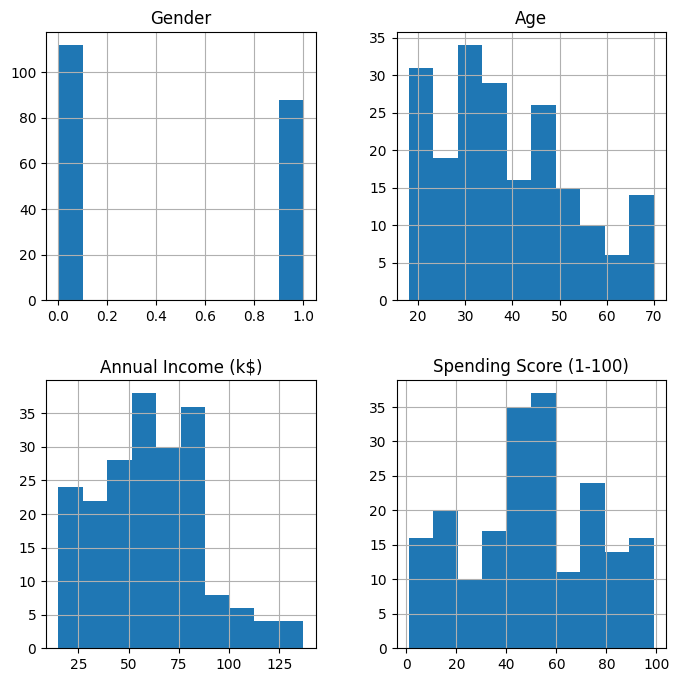

In [127]:
data.hist(figsize=(8,8),)
plt.show()

In [128]:
colnames_numerics_only = data.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

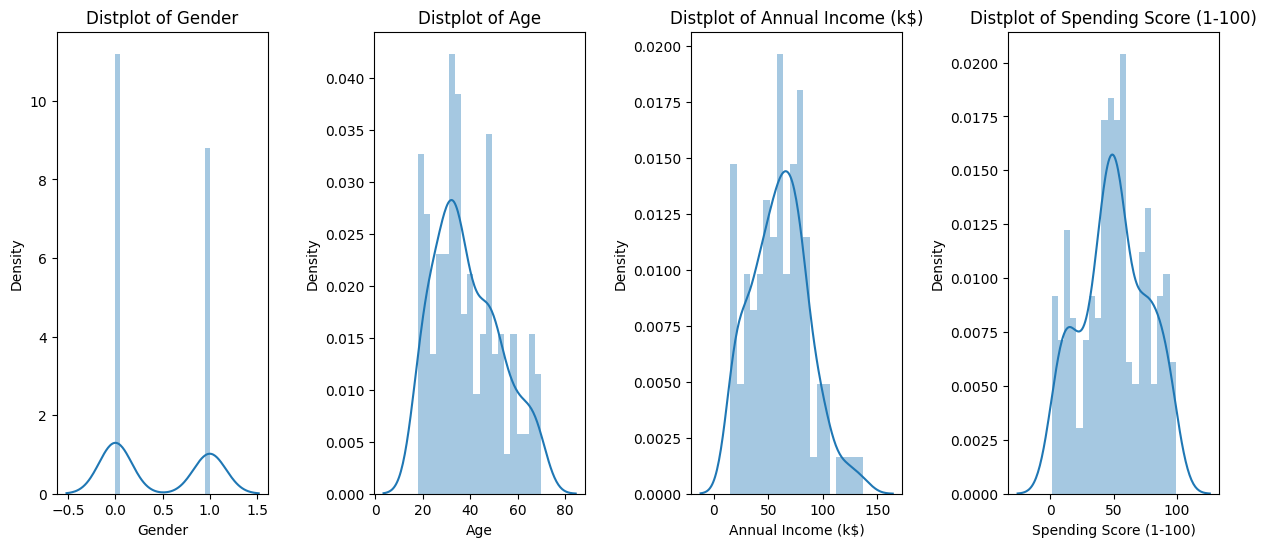

In [129]:
plt.figure(1,figsize=(15,6))
n=0
for x in colnames_numerics_only:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

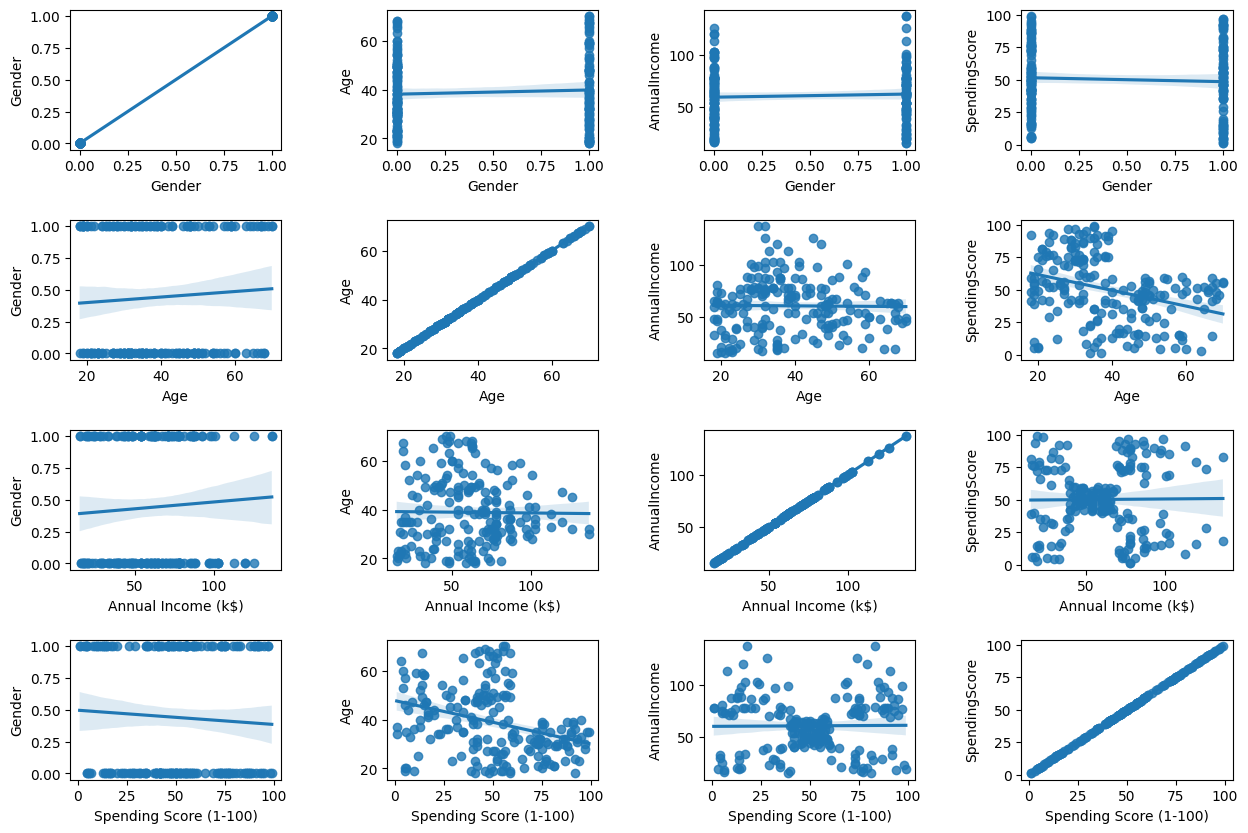

In [130]:
plt.figure(1,figsize=(15,10))
n=0
for x in colnames_numerics_only:
    for y in colnames_numerics_only:
        n+=1
        plt.subplot(4,4,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=data)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

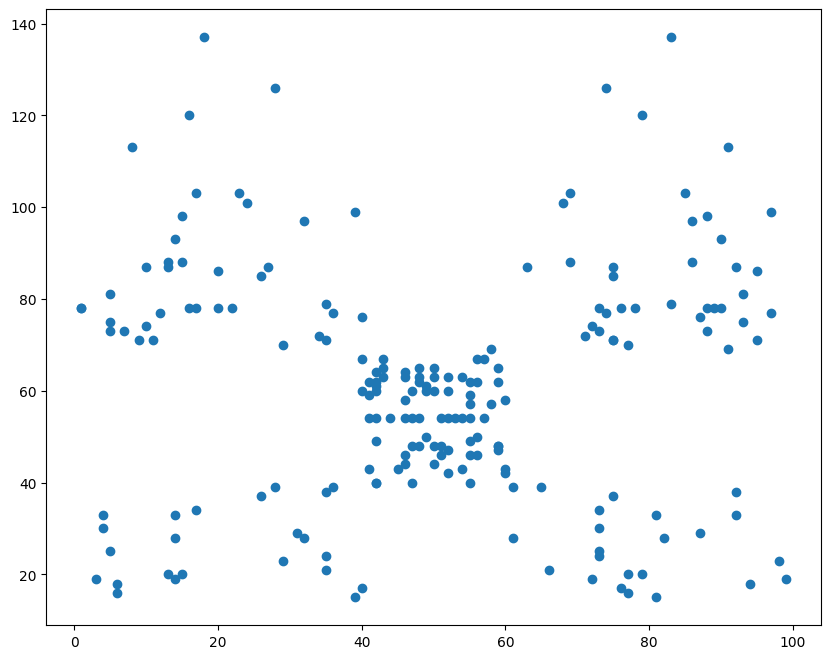

In [131]:
#Spending score and Annual income
plt.figure(figsize=(10,8))
plt.scatter(data["Spending Score (1-100)"], data["Annual Income (k$)"])

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

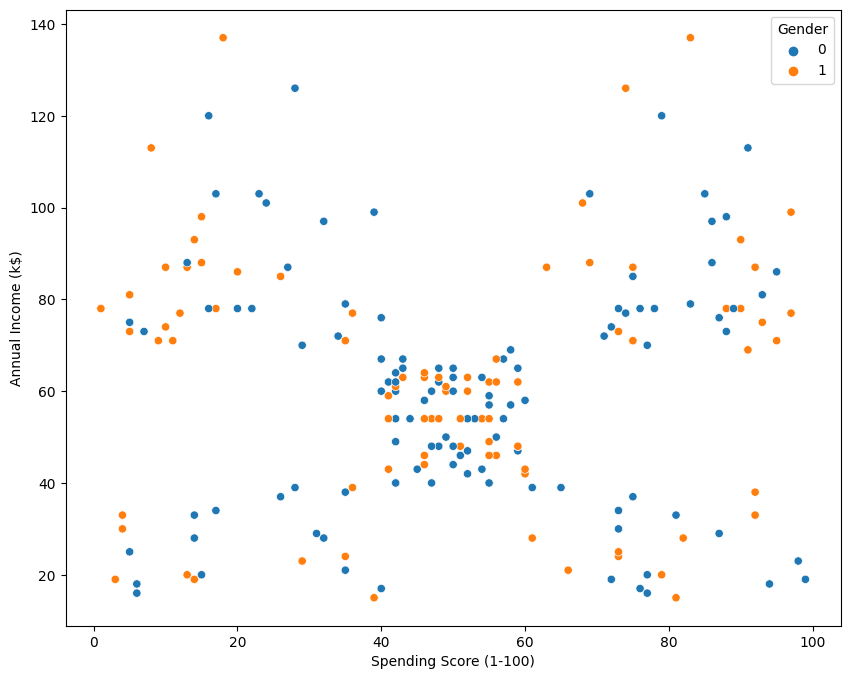

In [132]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender")

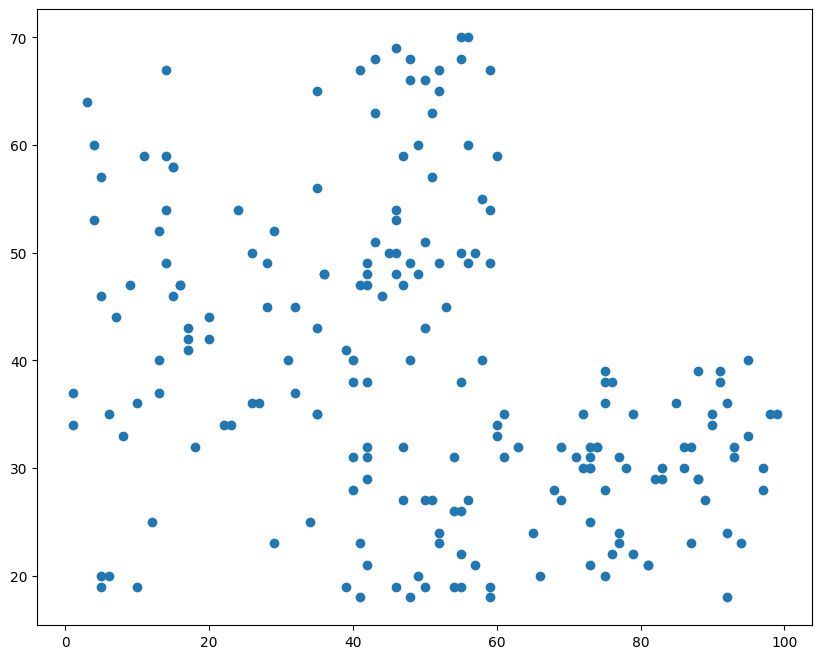

In [133]:
#Spending score and Age
plt.figure(figsize=(10,8))
plt.scatter(data["Spending Score (1-100)"], data["Age"])

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

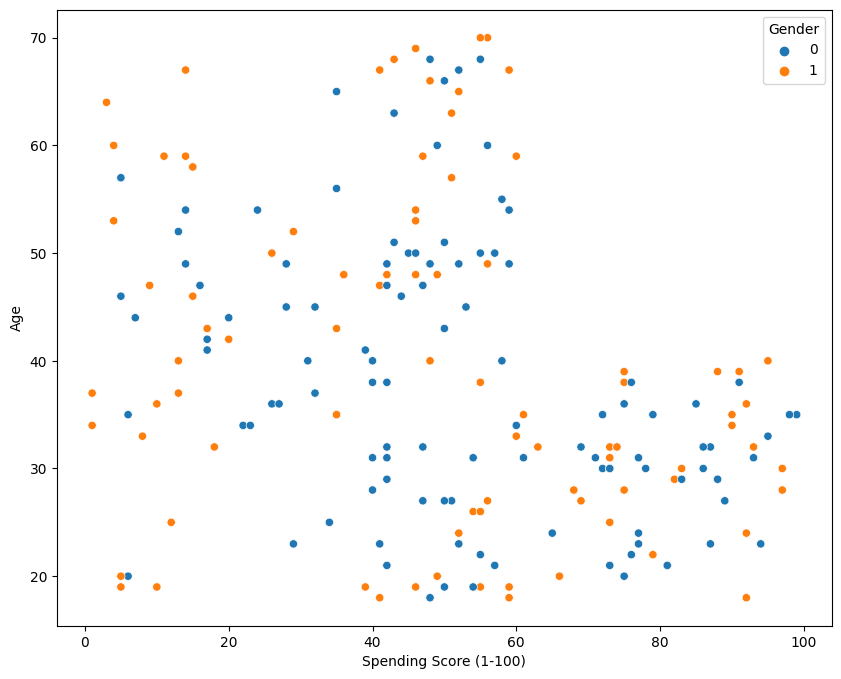

In [134]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Spending Score (1-100)", y="Age", hue="Gender")

# Customers segmentation by K-means

### Feature selection

In [135]:
feature1 = data[['Age', 'Spending Score (1-100)']]

In [136]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(feature1)

### Determine the optimal number of clusters using the Elbow Method

In [137]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features1)
    wcss.append(kmeans.inertia_)

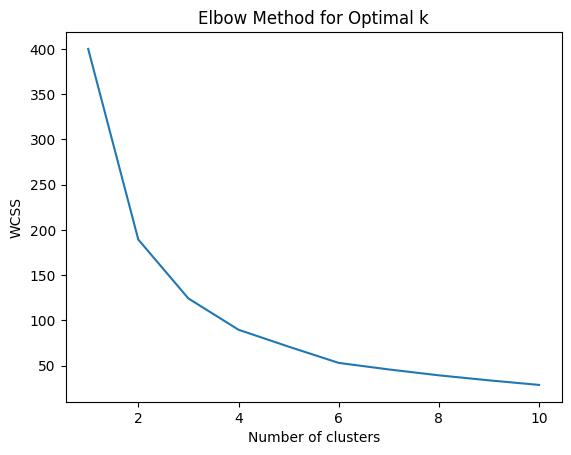

In [138]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for Within-Cluster Sum of Squares
plt.show()

### Determine the optimal number of clusters using the Silhouette Score

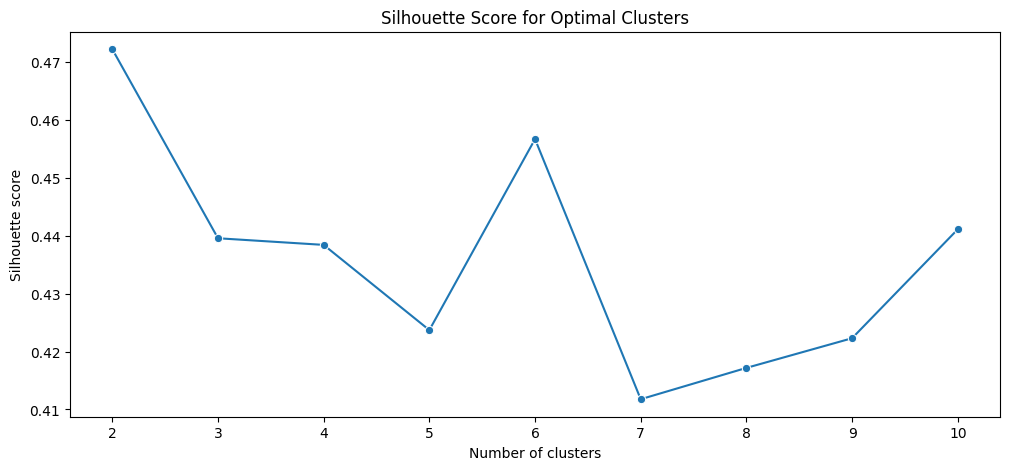

In [139]:

clusters = range(2, 11)  # You can adjust the range based on your needs
s_scores = []

for n_clusters in clusters:
    #kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_features1)
    silhouette_avg = silhouette_score(scaled_features1, cluster_labels)
    s_scores.append(silhouette_avg)

# Plot the Silhouette Score
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=clusters, y=s_scores, marker='o', ax=ax)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.set_title("Silhouette Score for Optimal Clusters")
plt.show()

### Choose the optimal number of clusters and perform KMeans clustering

In [140]:
# Choose the optimal number of clusters and perform KMeans clustering
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features1)





In [141]:
k_means_labels = kmeans.labels_
k_means_labels

array([0, 2, 4, 2, 0, 2, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 0, 3, 2, 4, 2,
       3, 2, 3, 2, 1, 0, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 5, 2, 1, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 5, 1, 1, 1, 5, 0, 1, 5, 0, 5, 1, 5, 0,
       1, 5, 0, 0, 5, 1, 5, 5, 5, 0, 1, 1, 0, 1, 5, 1, 5, 1, 0, 1, 1, 0,
       0, 1, 5, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 5, 0, 1, 0, 5, 1, 5, 5,
       5, 0, 1, 0, 0, 0, 5, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 4, 2, 3, 2, 4, 2, 3, 2, 0, 2, 4, 2, 1, 2, 4, 2, 4, 2, 3, 2,
       3, 2, 4, 2, 4, 2, 1, 2, 4, 2, 3, 2, 4, 2, 4, 0, 4, 2, 4, 2, 3, 2,
       3, 2, 3, 2, 4, 2, 3, 2, 1, 2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 2, 1, 2,
       4, 2], dtype=int32)

In [142]:
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[-0.98830286,  0.01062485],
       [ 0.59071744, -0.16514902],
       [-0.62254456,  1.24814723],
       [ 1.00613779, -1.40702839],
       [-0.37103379, -1.31216875],
       [ 1.86593393, -0.01358755]])

In [143]:
# Add the cluster information to the original dataset
data['Cluster'] = clusters

###  Visualize the clusters

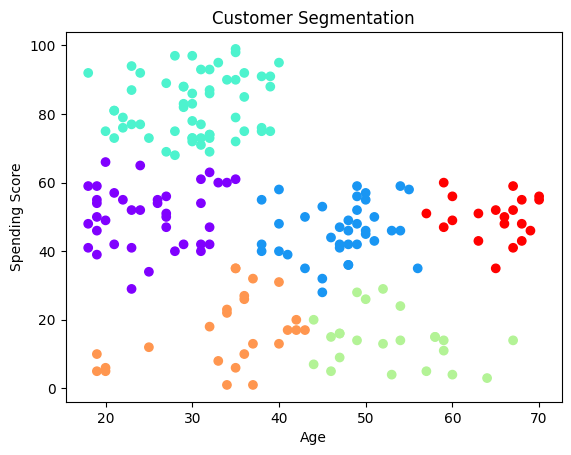

In [144]:
# Visualize the clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

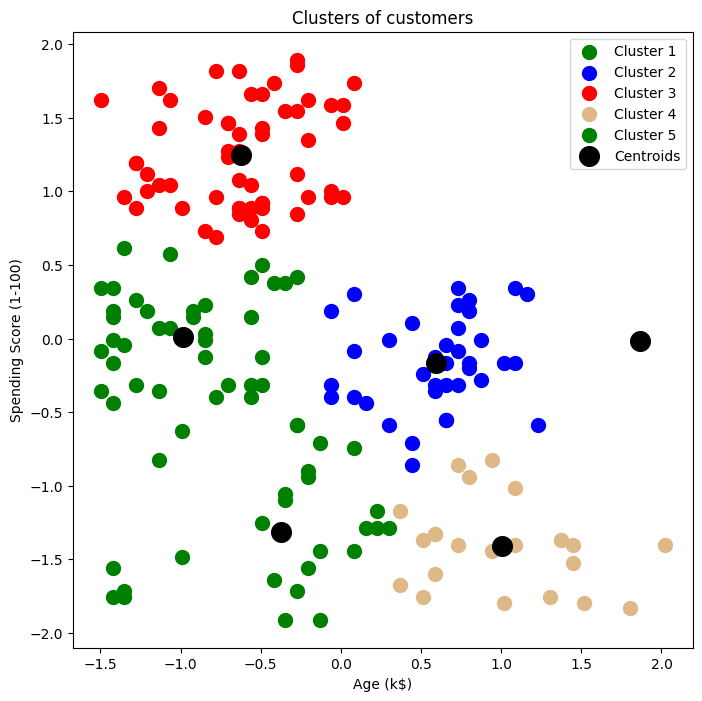

In [145]:
plt.figure(figsize=(8,8))
plt.scatter(scaled_features1[clusters == 0, 0], scaled_features1[clusters == 0, 1], s = 100, c = 'g', label = 'Cluster 1')
plt.scatter(scaled_features1[clusters == 1, 0], scaled_features1[clusters == 1, 1], s = 100, c = 'b', label = 'Cluster 2')
plt.scatter(scaled_features1[clusters == 2, 0], scaled_features1[clusters == 2, 1], s = 100, c = 'r', label = 'Cluster 3')
plt.scatter(scaled_features1[clusters == 3, 0], scaled_features1[clusters == 3, 1], s = 100, c = 'burlywood', label = 'Cluster 4')
plt.scatter(scaled_features1[clusters == 4, 0], scaled_features1[clusters == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [146]:
# Analyze the characteristics of each cluster
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.394737  25.078947           52.421053               50.473684
1        0.324324  47.081081           59.108108               45.945946
2        0.421053  30.175439           66.070175               82.350877
3        0.478261  52.869565           60.347826               13.956522
4        0.560000  33.680000           68.640000               16.400000
5        0.600000  64.850000           53.150000               49.850000


# Model Evaluation 

In [147]:
# Evaluate using Silhouette Coefficient
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(scaled_features1, clusters)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.4566283030197353


In [148]:

from sklearn.metrics import pairwise_distances
# Calculate pairwise distances between data points and cluster centers
distances = pairwise_distances(scaled_features1, kmeans.cluster_centers_)

In [149]:
# Calculate cluster cohesion as the average distance within each cluster
cohesion = np.mean(np.min(distances, axis=1))
print("Cluster Cohesion:", cohesion)

Cluster Cohesion: 0.4658318762631805


In [150]:
# Calculate entropy
entropy = metrics.cluster.entropy(clusters)
print("Entropy:", entropy)
print("purity=" , 100-entropy)

Entropy: 1.7243720307322183
purity= 98.27562796926779
